+ >#### Automobile market analysis based on wide range of attributes and features.Using the database conanting car details such as Manufacturer, Model, Prod. year,Category,Leather interior,Fuel type,Engine volume,number of Cylinders,Gear box type and more.


In [3]:
# import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> ### Load the data file 

> #### Create the DataFrame using pandas 

In [40]:
car_price_main_data = pd.read_csv("D:\Ajay\Project\Automobile market analysis\Automobile market analysis.csv")
car_price_main_data.head()

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45802808.0,49889,HYUNDAI,Santa FE,2015,Jeep,Yes,Diesel,2.2,4,Automatic,Front,4,Left wheel,White,4
1,45804658.0,49889,HYUNDAI,Tucson,2016,Jeep,Yes,Diesel,1.7,4,Automatic,Front,4,Left wheel,Black,4
2,45350525.0,49864,MERCEDES-BENZ,CLA 250,2013,Sedan,Yes,Petrol,2.0,4,Automatic,Front,4,Left wheel,White,0
3,45786449.0,49864,LEXUS,ES 300,2013,Sedan,Yes,Hybrid,3.0,10,Automatic,Front,4,Left wheel,Black,12
4,43802229.0,49864,TOYOTA,Land Cruiser Prado,2010,Jeep,Yes,Petrol,2.7,4,Automatic,4x4,2,Left wheel,White,8


> **Create a copy of Main database for manipulation & processing**

In [5]:
car_price=car_price_main_data.copy()

> ### Check the various attributes of data like
    1. Missing values
    2. Check Datatype
    3. Check Numberof unique values
    4. Satistic of database

In [6]:
car_price.shape

(9336, 16)

> **There are 9336 Rows and 16 Colums in databse**

In [7]:
car_price.dtypes

ID                  float64
Price                 int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
car_price.columns

Index(['ID', 'Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

> ###  Remove columns which are not required for processing

In [9]:
car_price.drop( columns ="ID",inplace=True,axis=0)

> ### Checking Null values and DataType

In [10]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             9336 non-null   int64  
 1   Manufacturer      9336 non-null   object 
 2   Model             9336 non-null   object 
 3   Prod. year        9336 non-null   int64  
 4   Category          9336 non-null   object 
 5   Leather interior  9336 non-null   object 
 6   Fuel type         9336 non-null   object 
 7   Engine volume     9336 non-null   float64
 8   Cylinders         9336 non-null   int64  
 9   Gear box type     9336 non-null   object 
 10  Drive wheels      9336 non-null   object 
 11  Doors             9336 non-null   int64  
 12  Wheel             9336 non-null   object 
 13  Color             9336 non-null   object 
 14  Airbags           9336 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.1+ MB


In [11]:
car_price.isnull().sum()

Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

>**Missing Value Treatment**
>#### Null Values not present in the dataset

In [12]:
car_price.describe()

,Price,Prod. year,Engine volume,Cylinders,Doors,Airbags
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,21507.948265,2012.082369,2.255302,4.463153,3.953406,6.213796
std,9861.825452,4.020084,0.833070,1.106892,0.331643,3.731010
min,10000.000000,1953.000000,0.000000,1.000000,2.000000,0.000000
25%,14105.000000,2010.000000,1.800000,4.000000,4.000000,4.000000
50%,18503.000000,2013.000000,2.000000,4.000000,4.000000,4.000000
75%,26306.000000,2015.000000,2.500000,4.000000,4.000000,10.000000
max,49889.000000,2020.000000,20.000000,16.000000,5.000000,16.000000


 > **Insight from statistics:**

 Price cars 
-- Avg price = 21507	

-- Min price = 10000

-- Max price = 49889

In [13]:
print("Total manufactures count",len(car_price_main_data["Manufacturer"].unique()))
print("Total Model Count",(len(car_price_main_data["Model"].unique())))


Total manufactures count 52
Total Model Count 843


> **Insight from statistics:**

> 1) Dataset cover 843 car models From 52 manufactures each having different attributes like size,weight,engine capacities vary across cars

> 2) Price ranges from 10000 to 50000 dollar and 
    average price is about 21507 dollar

> ### Checking Count of Cloumns

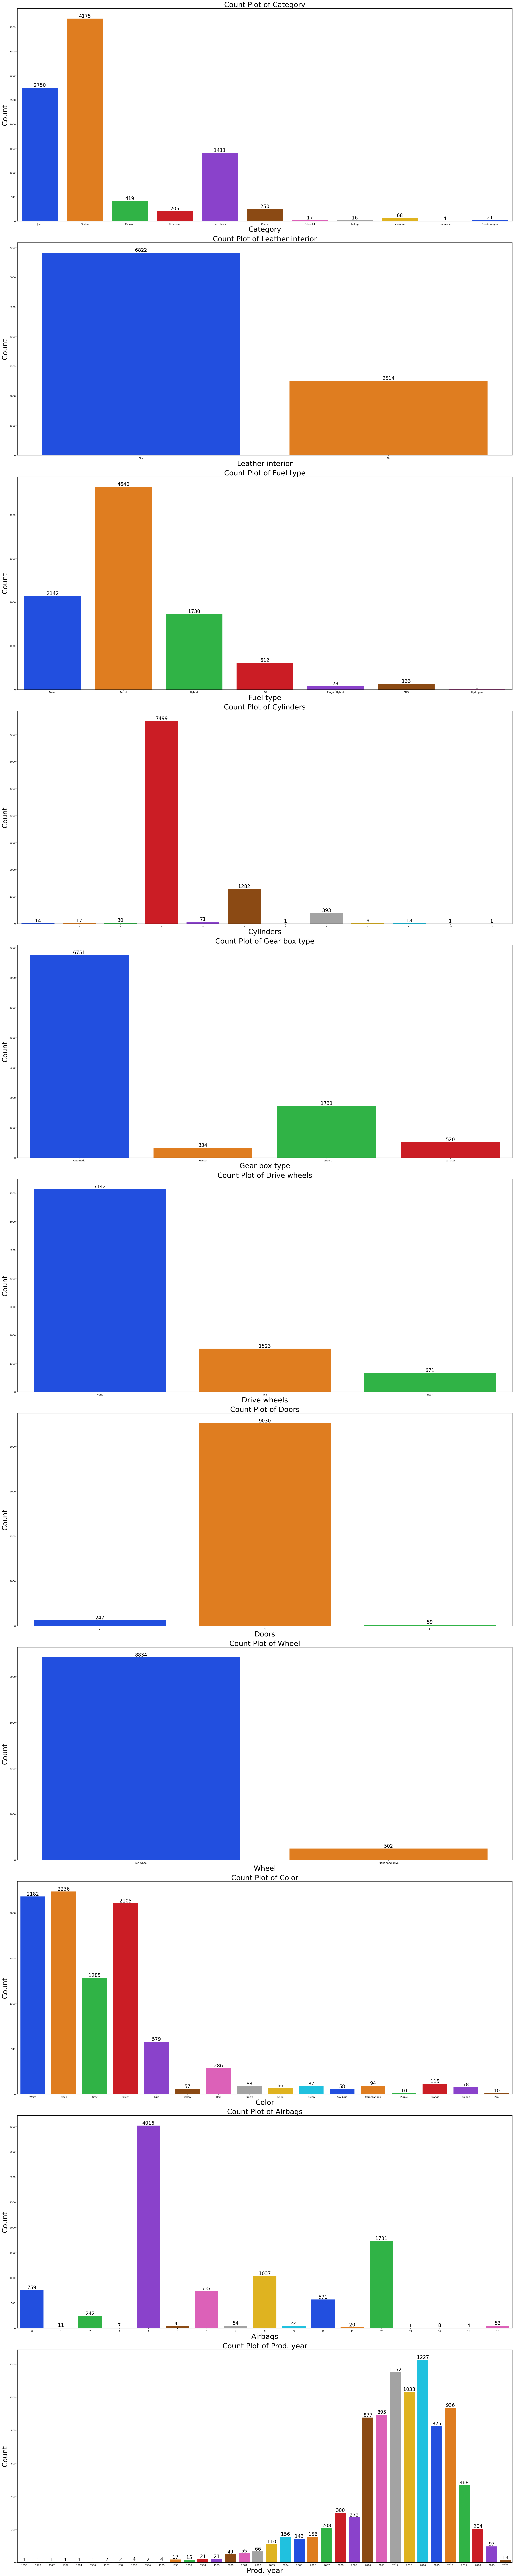

In [14]:
# Define the list of categorical columns to analyze
categorical_columns = ['Category','Leather interior', 'Fuel type',  'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags','Prod. year']

# Create subplots
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(30, 150))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car_price[column], data=car_price, palette='bright', ax=axes[i])

    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=20)
    axes[i].set_title(f'Count Plot of {column.capitalize()}',size=30)
    axes[i].set_xlabel(column.capitalize(),size=30)
    axes[i].set_ylabel('Count',size=30)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

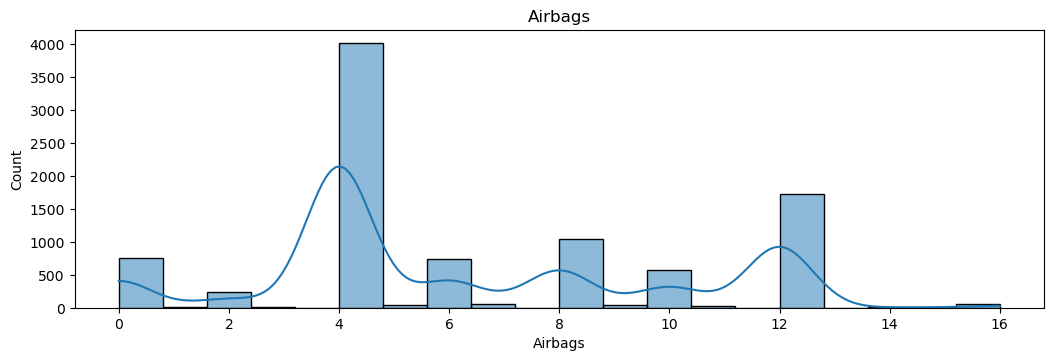

In [15]:
# Distribution of Numerical Features
numerical_features = ["Airbags"]

plt.figure(figsize=(50, 10))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car_price[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

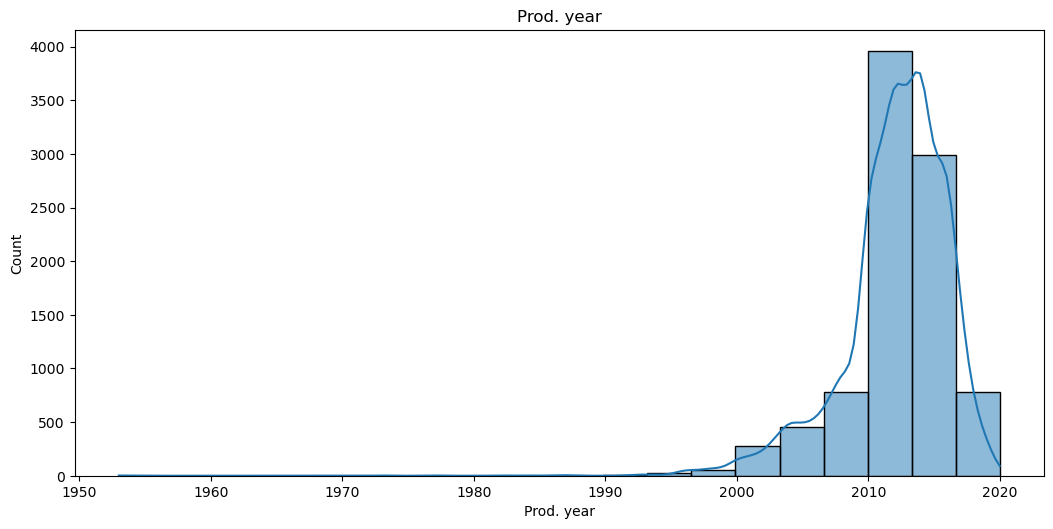

In [16]:
# Distribution of Numerical Features
numerical_features = ["Prod. year"]

plt.figure(figsize=(50, 10))
for feature in numerical_features:
    plt.subplot(2, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car_price[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

> **Price Count Price**

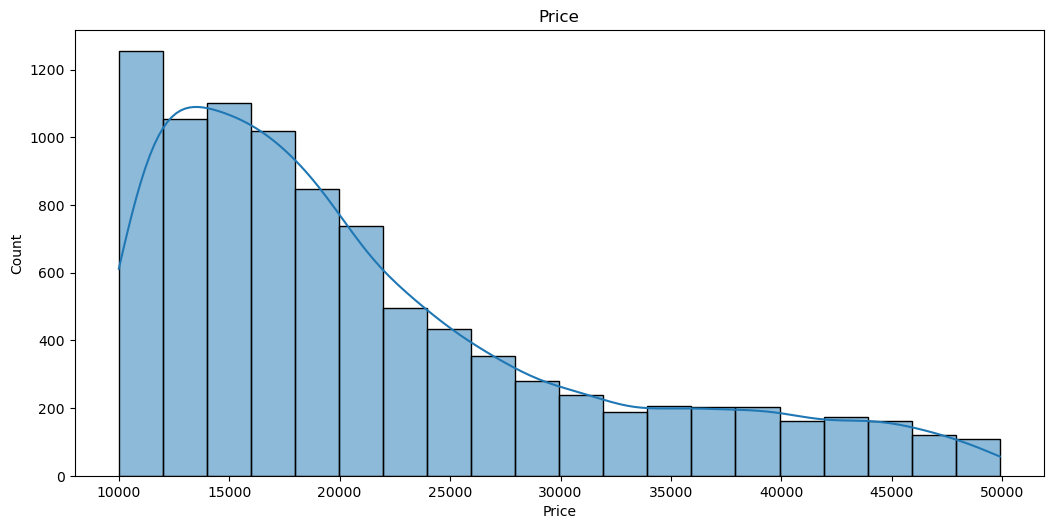

In [17]:
# Distribution of Numerical Features
numerical_features = ["Price"]

plt.figure(figsize=(50, 10))
for feature in numerical_features:
    plt.subplot(2, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car_price[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [18]:
top_car_model = car_price['Model'].value_counts().head()
top_car_model

Model
Elantra    734
Prius      687
Sonata     656
Camry      430
H1         415
Name: count, dtype: int64

In [19]:
top_car_models1 = car_price["Manufacturer"].value_counts().head()
top_car_models1

Manufacturer
HYUNDAI          2829
TOYOTA           2058
MERCEDES-BENZ     618
CHEVROLET         528
FORD              438
Name: count, dtype: int64

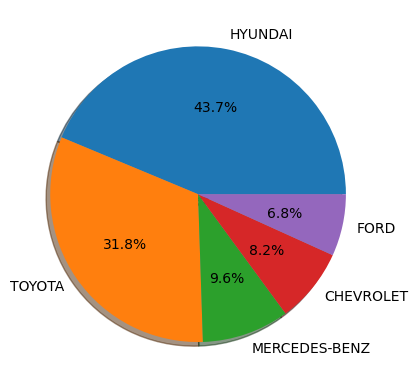

In [20]:
x = ["HYUNDAI", "TOYOTA" , "MERCEDES-BENZ" ,"CHEVROLET" , "FORD"]
plt.pie(top_car_models1,labels=x,autopct = "%0.1f%%",shadow = True,radius = 1)
plt.show()

In [21]:
numerical_features = ["Price",	"Prod. year"	,"Engine volume"	,"Cylinders","Doors",	"Airbags"]
car_price[numerical_features].corr()

,Price,Prod. year,Engine volume,Cylinders,Doors,Airbags
Price,1.000000,0.387449,0.151260,0.068120,0.034184,-0.042196
Prod. year,0.387449,1.000000,-0.263981,-0.304297,0.132964,0.033179
Engine volume,0.151260,-0.263981,1.000000,0.739869,-0.084930,0.206280
Cylinders,0.068120,-0.304297,0.739869,1.000000,-0.099955,0.202935
Doors,0.034184,0.132964,-0.084930,-0.099955,1.000000,-0.030907
Airbags,-0.042196,0.033179,0.206280,0.202935,-0.030907,1.000000


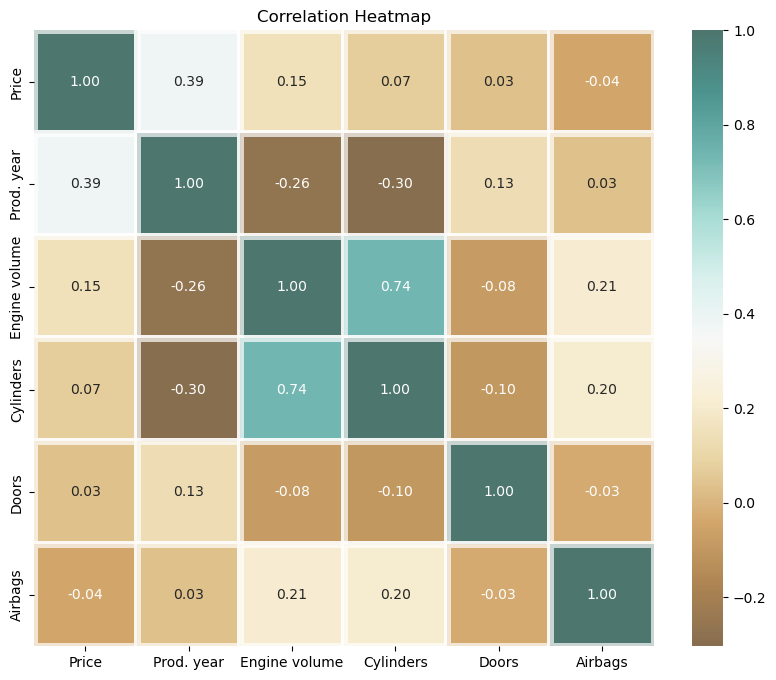

In [22]:
# Correlation Analysis
correlation_matrix = car_price[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG',fmt=".2f",alpha = 0.7,linewidth = 5)
plt.title('Correlation Heatmap')
plt.show()

# **ANALYSIS**